### dev code for site restricted pain

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from subject_select import check_field, check_count
from clean_questions import disease_label

In [3]:
df = pd.read_csv('./data/qsidp_patients_pain.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(3363, 2861)

In [5]:
# restrict to those with one of the 3+ month cwp
fields = pd.read_csv('./bbk_codes/cwp_code.csv')
ff = fields[fields['code']!=6159]['code'].to_list()
fn = fields[fields['code']!=6159]['Field title'].to_list()

In [6]:
# disease
dfields = pd.read_csv('./bbk_codes/disease_code_select.csv')
# df = fields[fields['code']!=6159]['code'].to_list()
# dn = fields[fields['code']!=6159]['Field title'].to_list()

In [7]:
disease_status = disease_label(df, visits=[2], grouping='select')

In [15]:
disease_status.shape

(3363, 14)

In [18]:
ds = disease_status.columns
for d in ds:
    idx = disease_status[d]==1
    print(df[idx.values].shape)

(78, 2861)
(110, 2861)
(159, 2861)
(263, 2861)
(50, 2861)
(128, 2861)
(545, 2861)
(584, 2861)
(767, 2861)
(91, 2861)
(1497, 2861)
(163, 2861)
(22, 2861)
(157, 2861)


In [9]:
fls = []
for f in ff:
    fls += check_field(df, f)

In [10]:
fls

['3799-2.0',
 '4067-2.0',
 '3404-2.0',
 '3571-2.0',
 '3741-2.0',
 '3414-2.0',
 '3773-2.0',
 '2956-2.0']

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages

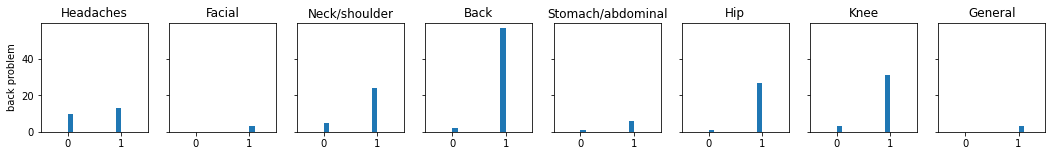

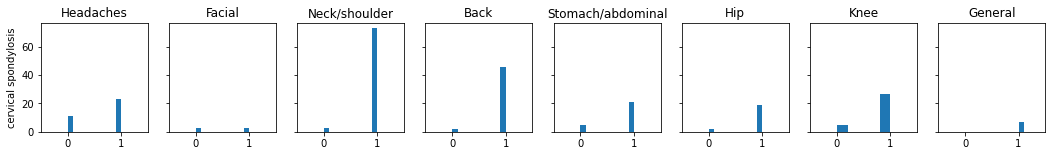

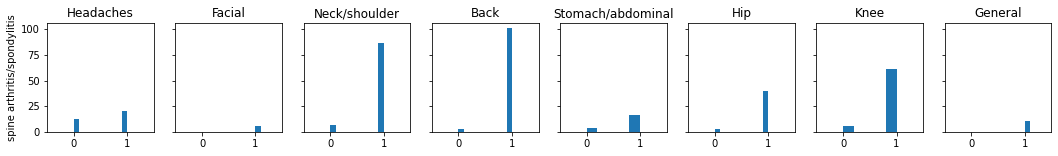

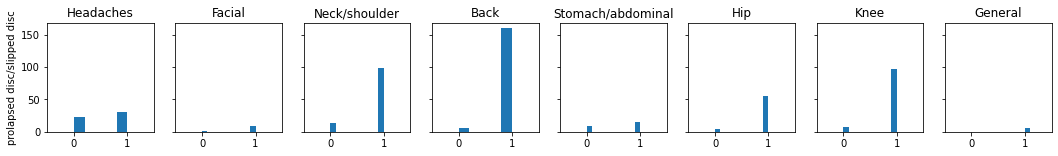

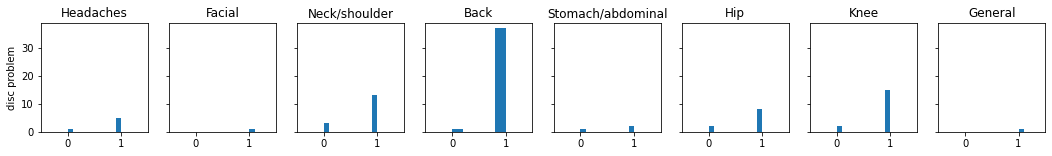

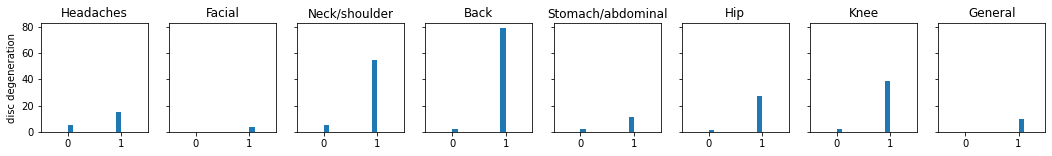

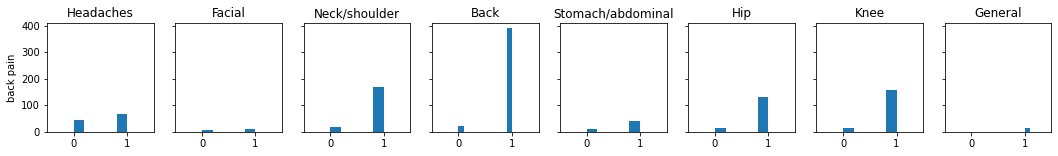

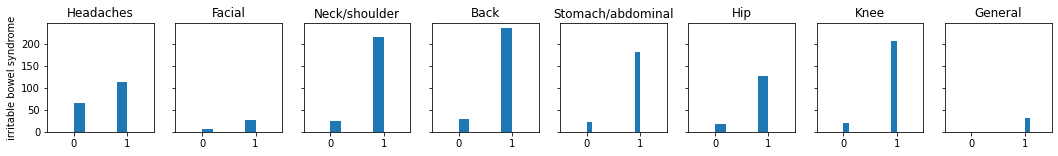

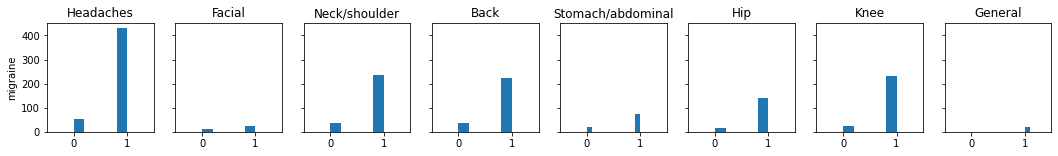

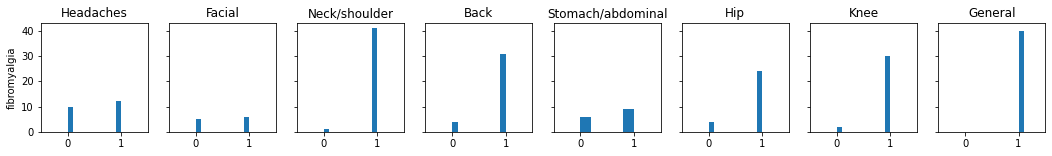

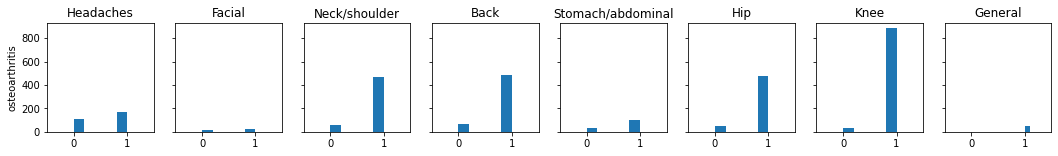

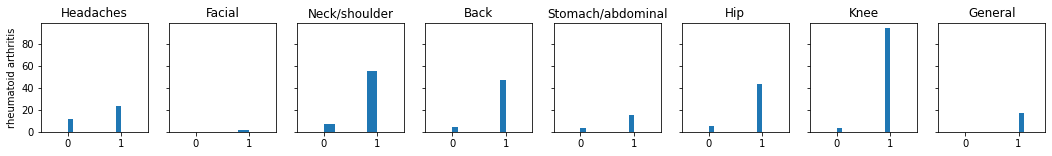

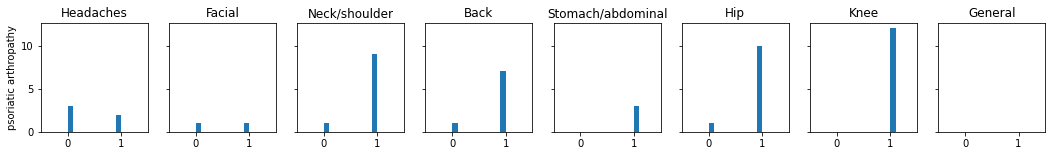

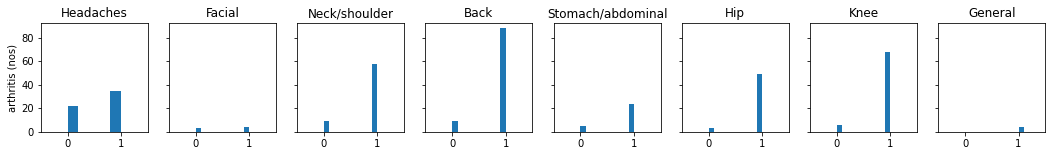

In [24]:
for d in ds:
#     print(d)
    idx = disease_status[d]==1
    df_tmp = df[idx.values]
    fig, ax = plt.subplots(1,len(fls), figsize=(18,2), sharey=True)
    for i, f in enumerate(fls):
        df_tmp[f].plot(kind='hist', ax=ax[i])
        ax[i].set_title(fn[i].split(' ')[0])
        ax[i].set_ylabel(d)
        ax[i].set_xlim(-.5,1.5)